# Examples for Using sonyc_visualization Package

This notebook demonstrates the various usages of the sonyc_visualization module that were created to be used for visualizing SONYC-UST data. Functions range from creating heatmaps to making graphs across various temporal attributes and sensor data.

In [12]:
#import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import geopandas as gpd
import sys
sys.path.insert(1, '/home/dhz220/myjupyter/SONYC-UST-Visualization')
import sonyc_visualization as vis
from sonyc_visualization import core

In [13]:
#load dataset, get rid of unnecessary columns, and extract only rows where there is occurrence of a specific class

enginedf = vis.core.load_df('annotations.csv', ['1_engine_presence','1-1_small-sounding-engine_presence',
       '1-2_medium-sounding-engine_presence',
       '1-3_large-sounding-engine_presence',
       '1-X_engine-of-uncertain-size_presence'], '1_engine_presence')

enginedf.head()

,split,sensor_id,audio_filename,borough,block,latitude,longitude,year,week,day,hour,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,1_engine_presence
0,test,0,00_026884.wav,Manhattan,547,40.72951,-73.99388,2019,43,4,8,False,True,True,False,True
1,test,0,00_026919.wav,Manhattan,547,40.72951,-73.99388,2019,20,1,20,False,False,True,False,True
2,test,0,00_027065.wav,Manhattan,547,40.72951,-73.99388,2019,35,6,11,False,True,True,False,True
6,test,0,00_027218.wav,Manhattan,547,40.72951,-73.99388,2019,46,6,18,False,False,False,False,True
8,test,0,00_027302.wav,Manhattan,547,40.72951,-73.99388,2019,28,0,19,False,False,False,False,True


In [14]:
#create a GeoDataFrame which makes latitude and longitude easier to work with and map out using 'geometry'

enginedf = vis.core.create_geodataframe(enginedf, True)
enginedf.head()

/home/dhz220/miniconda3/envs/py36/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,split,sensor_id,audio_filename,borough,block,latitude,longitude,year,week,day,hour,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,1_engine_presence,geometry
0,test,0,00_026884.wav,Manhattan,547,40.72951,-73.99388,2019,43,4,8,False,True,True,False,True,POINT (-73.99388 40.72951)
1,test,0,00_026919.wav,Manhattan,547,40.72951,-73.99388,2019,20,1,20,False,False,True,False,True,POINT (-73.99388 40.72951)
2,test,0,00_027065.wav,Manhattan,547,40.72951,-73.99388,2019,35,6,11,False,True,True,False,True,POINT (-73.99388 40.72951)
6,test,0,00_027218.wav,Manhattan,547,40.72951,-73.99388,2019,46,6,18,False,False,False,False,True,POINT (-73.99388 40.72951)
8,test,0,00_027302.wav,Manhattan,547,40.72951,-73.99388,2019,28,0,19,False,False,False,False,True,POINT (-73.99388 40.72951)


### Heatmap

In [15]:
enginehm = vis.core.heatmap(enginedf, [40.693943, -74.025])
display(enginehm)

In [16]:
machinerydf = vis.core.load_df('annotations.csv', ['2-1_rock-drill_presence','2-2_jackhammer_presence', 
        '2-3_hoe-ram_presence','2-4_pile-driver_presence','2-X_other-unknown-impact-machinery_presence',
        '2_machinery-impact_presence'], '2_machinery-impact_presence')

machinerydf.head()

,split,sensor_id,audio_filename,borough,block,latitude,longitude,year,week,day,hour,2-1_rock-drill_presence,2-2_jackhammer_presence,2-3_hoe-ram_presence,2-4_pile-driver_presence,2-X_other-unknown-impact-machinery_presence,2_machinery-impact_presence
31,test,1,01_027742.wav,Manhattan,541,40.73033,-73.99870,2019,52,6,20,False,False,False,False,True,True
38,test,2,02_027570.wav,Manhattan,548,40.73118,-73.99443,2019,27,0,10,False,False,False,False,True,True
63,test,4,04_027205.wav,Manhattan,535,40.72898,-73.99629,2019,48,4,13,False,False,False,False,True,True
71,test,4,04_027657.wav,Manhattan,535,40.72898,-73.99629,2019,35,3,13,True,True,False,False,False,True
84,test,5,05_027010.wav,Brooklyn,142,40.69398,-73.98697,2019,25,1,16,False,False,False,False,False,True


In [17]:
machinerydf = vis.core.create_geodataframe(machinerydf, True)

/home/dhz220/miniconda3/envs/py36/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


### Layered Heatmap 

In [18]:
combined_hm = vis.core.add_heatmap(enginehm, machinerydf)
display(combined_hm)

### Cluster Map

In [19]:
engine_cluster = vis.core.clustermap(enginedf, '1_engine_presence', [40.693943, -74.025])
display(engine_cluster)

### Piechart to show Occurrence By Borough 

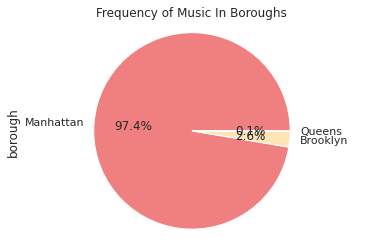

<Figure size 207360x20736 with 0 Axes>

In [20]:
vis.core.occurrence_by_borough(machinerydf)

### Barplot By Year (can also be by week, day, or hour)

<AxesSubplot:title={'center':'Engine occurrence by year'}, xlabel='year', ylabel='count'>

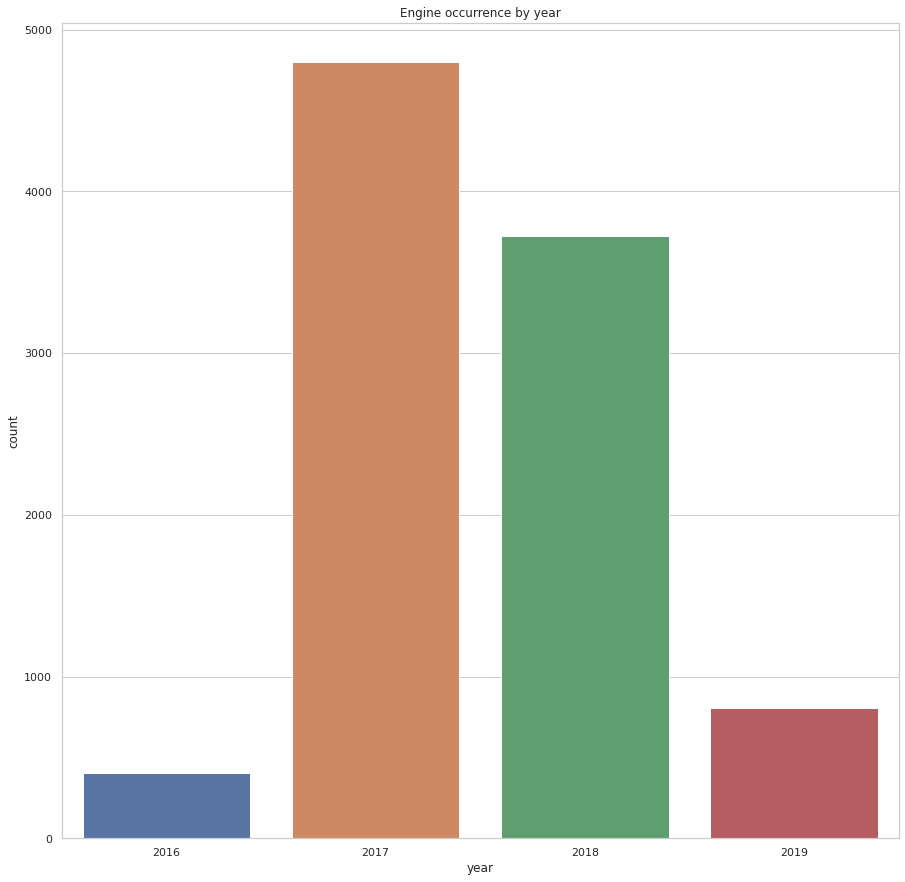

In [21]:
vis.core.occurrence_by_time(enginedf, 'year', 'Engine')

### Barplot of Class Frequency by Sensor 

<AxesSubplot:xlabel='sensor_id', ylabel='Machinery Impact Presence Occurrence By Sensor'>

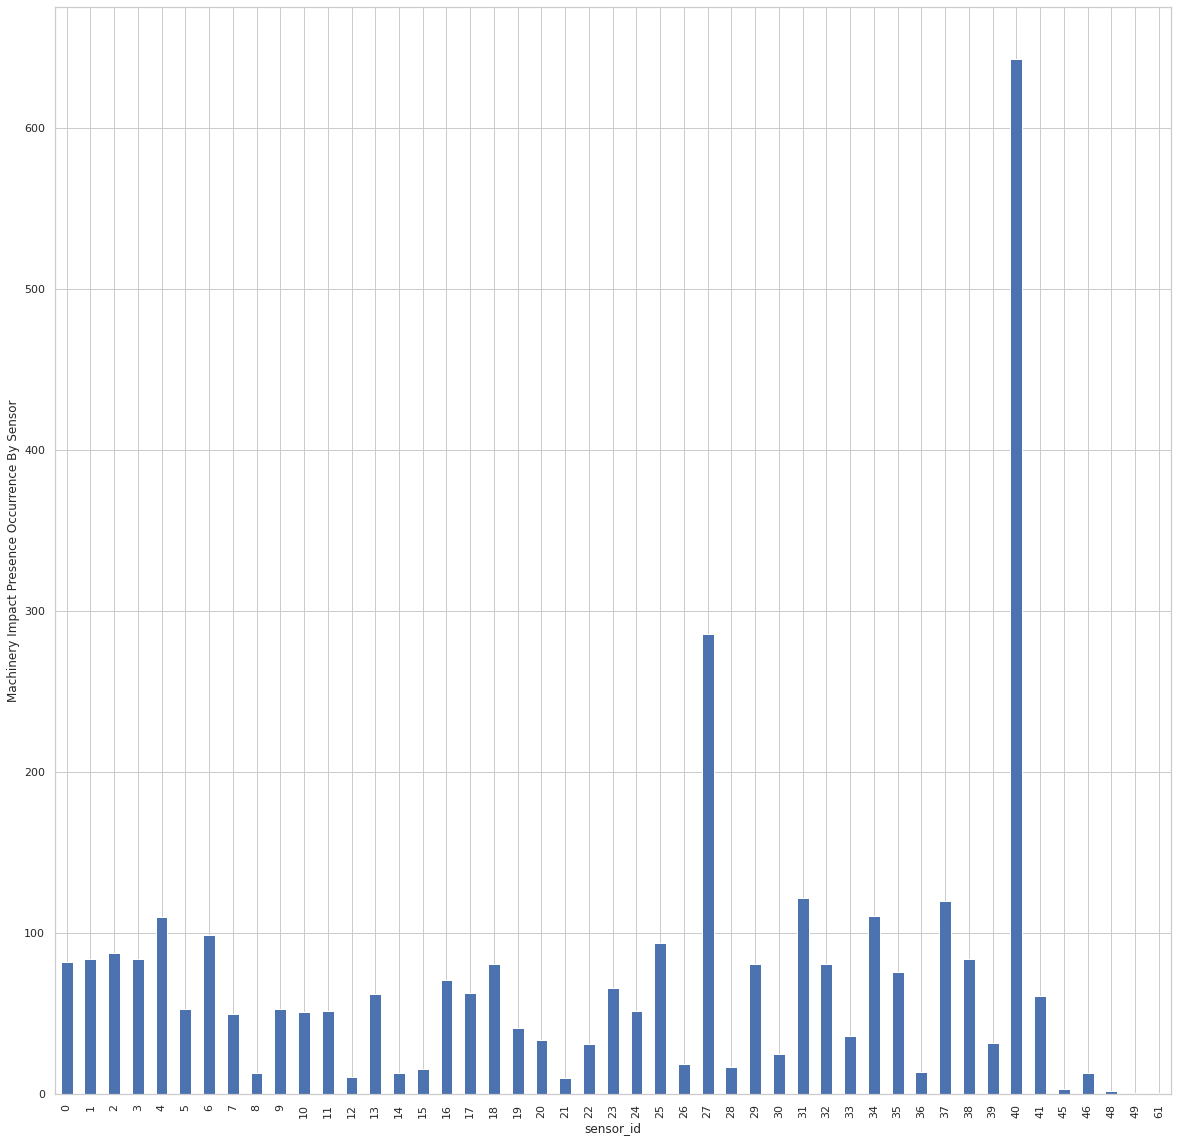

In [22]:
vis.core.occurrence_by_sensor(machinerydf, '2_machinery-impact_presence', 'Machinery Impact')